In [1]:
import mysql.connector
import sqlalchemy as db
import pandas as pd
import numpy as np

In [2]:
con = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'Funicula8'
)

In [3]:
c = con.cursor(buffered=True)
query = 'show databases'
c.execute(query)

In [4]:
query = 'USE world'
c.execute(query)

In [5]:
query = 'SELECT Name, Continent, Region, IndepYear, Population \
FROM country \
WHERE Population !=0 \
ORDER BY Population ASC \
LIMIT 10;'
c.execute(query)
cou = c.fetchall()

In [6]:
coucols = c.column_names
coucols

('Name', 'Continent', 'Region', 'IndepYear', 'Population')

In [7]:
country = pd.DataFrame(cou,columns = coucols)
country

,Name,Continent,Region,IndepYear,Population
0,Pitcairn,Oceania,Polynesia,NaN,50
1,Cocos (Keeling) Islands,Oceania,Australia and New Zealand,NaN,600
2,Holy See (Vatican City State),Europe,Southern Europe,1929.0,1000
3,Falkland Islands,South America,South America,NaN,2000
4,Tokelau,Oceania,Polynesia,NaN,2000
5,Niue,Oceania,Polynesia,NaN,2000
6,Norfolk Island,Oceania,Australia and New Zealand,NaN,2000
7,Christmas Island,Oceania,Australia and New Zealand,NaN,2500
8,Svalbard and Jan Mayen,Europe,Nordic Countries,NaN,3200
9,Saint Helena,Africa,Western Africa,NaN,6000


In [8]:
query = 'SELECT CountryCode, AVG(Population) AS mean \
FROM city \
GROUP BY CountryCode \
ORDER BY AVG(Population) DESC \
LIMIT 10;'
c.execute(query)
cit = c.fetchall()


In [9]:
citcols = c.column_names

In [10]:
city = pd.DataFrame(cit,columns = citcols)
city

,CountryCode,mean
0,SGP,4017733.0000
1,HKG,1650316.5000
2,URY,1236000.0000
3,GIN,1090610.0000
4,UGA,890800.0000
5,LBR,850000.0000
6,SLE,850000.0000
7,MLI,809552.0000
8,AUS,808119.0000
9,MNG,773700.0000


In [11]:
query = 'SELECT Language, COUNT(Language) AS bahasa \
FROM countrylanguage \
group by Language \
ORDER BY COUNT(Language) DESC \
LIMIT 10;'
c.execute(query)
lang = c.fetchall()

In [12]:
langcol = c.column_names

In [13]:
language = pd.DataFrame(lang,columns=langcol)
language

,Language,bahasa
0,English,60
1,Arabic,33
2,Spanish,28
3,French,25
4,German,19
5,Chinese,19
6,Russian,17
7,Italian,15
8,Creole English,14
9,Portuguese,12


### __2.2__

In [14]:
query = 'SELECT Continent, SUM(Population) AS Pop \
FROM country \
GROUP by continent;'
c.execute(query)
no2b = c.fetchall()

In [15]:
no2bcol=c.column_names

In [16]:
no2b1=pd.DataFrame(no2b,columns=no2bcol)
no2b1

,Continent,Pop
0,North America,482993000
1,Asia,3705025700
2,Africa,784475000
3,Europe,730074600
4,South America,345780000
5,Oceania,30401150
6,Antarctica,0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

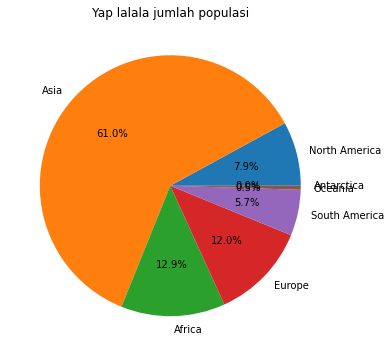

In [18]:
plt.figure(figsize=(10,6))
plt.pie(no2b1['Pop'],labels=no2b1['Continent'],
       autopct='%.1f%%')
plt.title('Yap lalala jumlah populasi')

# autopct artinya mau berapa angka roundingnya.
plt.show()

### __orang asia 61%__


### __2.3__
(Poin 10) Dari soal nomer 2, kita sudah mengetahui benua mana yang menyumbang populasi terbanyak. Pada soal nomor 3 ini, buatlah sebuah horizontal barplot, yang membagi tiap negara dalam benua tersebut. Tampilkan secara berurutan dalam barplot, 10 (sepuluh) negara yang menyumbang populasi terbanyak. Kriteria barplot:

In [19]:
query = 'SELECT * FROM country;'
c.execute(query)
no2c = c.fetchall()
no2ccol=c.column_names

In [20]:
no2c1=pd.DataFrame(no2c,columns=no2ccol)
no2c1

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [21]:
haha=no2c1.sort_values('Population',ascending=False).head(10)
hasil=haha[['Name','Population']]
hasil

,Name,Population
41,China,1277558000
99,India,1013662000
223,United States,278357000
98,Indonesia,212107000
30,Brazil,170115000
164,Pakistan,156483000
181,Russian Federation,146934000
21,Bangladesh,129155000
109,Japan,126714000
155,Nigeria,111506000


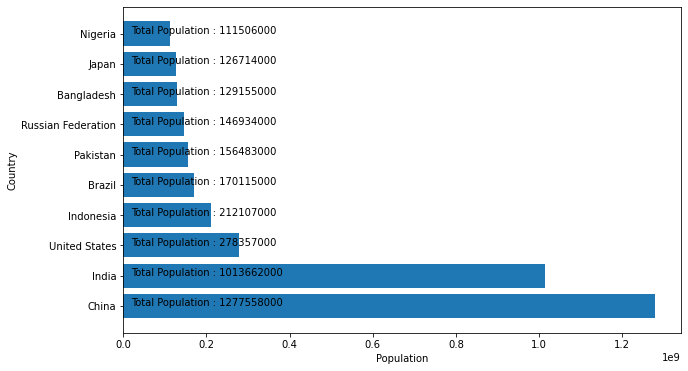

In [22]:
plt.figure(figsize=(10,6))
x=hasil['Population']
y=hasil['Name']
plt.barh(y,x)
plt.ylabel('Country')
plt.xlabel('Population')
plt.annotate('Total Population : 111506000',xytext = (20000000,'Nigeria'), xy=(0,'Nigeria'))
plt.annotate('Total Population : 126714000',xytext = (20000000,'Japan'), xy=(0,'Japan'))
plt.annotate('Total Population : 129155000',xytext = (20000000,'Bangladesh'), xy=(0,'Bangladesh'))
plt.annotate('Total Population : 146934000',xytext = (20000000,'Russian Federation'), xy=(0,'Russian Federation'))
plt.annotate('Total Population : 156483000',xytext = (20000000,'Pakistan'), xy=(0,'Pakistan'))
plt.annotate('Total Population : 170115000',xytext = (20000000,'Brazil'), xy=(0,'Brazil'))
plt.annotate('Total Population : 212107000',xytext = (20000000,'Indonesia'), xy=(0,'Indonesia'))
plt.annotate('Total Population : 278357000',xytext = (20000000,'United States'), xy=(0,'United States'))
plt.annotate('Total Population : 1013662000',xytext = (20000000,'India'), xy=(0,'India'))
plt.annotate('Total Population : 1277558000',xytext = (20000000,'China'), xy=(0,'China'))
plt.show()

Jawablah pertanyaan di bawah ini, berdasarkan horizontal bar plot yang sudah Anda buat.

Sebutkan negara dengan populasi terbanyak! China

Negara apakah yang menjadi urutan ke 10 berdasarkan horizontal barplot yang sudah Anda buat? Nigeria

Berapakah populasi negara yang berada di urutan ke-3? 278357000

### __4__
(Poin 20) Hitunglah:

IQR dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia

Hitunglah juga, Mean, Median, Standard Deviation, Upper Boundaries serta Lower Boundaries.

In [47]:
cont = no2c1.groupby('Continent')
Asia = cont.get_group('Asia')

In [74]:
Asiap = Asia[['LifeExpectancy']]
Asiap.describe()

,LifeExpectancy
count,51.000000
mean,67.441176
std,8.396527
min,45.900000
25%,62.700000
50%,68.500000
75%,72.700000
max,81.600000


In [75]:
no4a=pd.DataFrame()
no4a['mean']=Asiap.mean()
no4a['median']=Asiap.median()
no4a['std']=Asiap['LifeExpectancy'].std()
no4a['Q1']=np.quantile(Asiap,.25)
no4a['Q3']=np.quantile(Asiap,.75)
no4a['IQR']=np.quantile(Asiap,.75)-np.quantile(Asiap,.25)
no4a['Low']=no4a['Q1']-1.5*no4a['IQR']
no4a['Upper']=no4a['Q3']+1.5*no4a['IQR']
no4a

,mean,median,std,Q1,Q3,IQR,Low,Upper
LifeExpectancy,67.441176,68.5,8.396527,62.7,72.7,10.0,47.7,87.7


Buatlah sebuah Distribution Plot dari Angka Harapan Hidup di Benua Asia. Dan tampilkan pula di dalam Distribution Plot tersebut:

Garis vertikal untuk menandakan dimanakah letak Mean, Median, Upper Boundaries dan Lower Boundaries.
Tampilkan Legend agar memudahkan membaca plotnya.

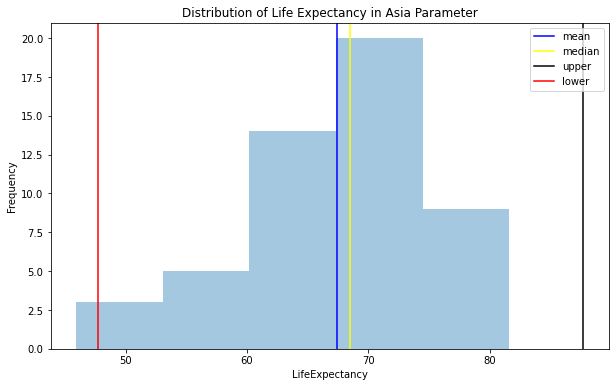

In [68]:
IQR = Asiap['LifeExpectancy'].quantile(0.75)-Asiap['LifeExpectancy'].quantile(0.25)
upper=Asiap['LifeExpectancy'].quantile(0.75)+(1.5*IQR)
lower=Asiap['LifeExpectancy'].quantile(0.25)-(1.5*IQR)

plt.figure(figsize=(10,6))
plt.title('Distribution of Life Expectancy in Asia Parameter')
sns.distplot(Asiap['LifeExpectancy'],bins=5,kde=False)
plt.ylabel('Frequency')
plt.axvline(Asiap['LifeExpectancy'].mean(),color='blue')
plt.axvline(Asiap['LifeExpectancy'].median(),color='yellow')
plt.axvline(upper,color='black')
plt.axvline(lower,color='red')
plt.legend(['mean','median','upper','lower'],loc=0)
plt.show()

Menurut Distribution Plot tersebut jawablah pertanyaan ini:

Apakah terdapat negara yang Angka Harapan Hidup-nya berada pada outliers? Jika ada, tampilkan dalam bentuk Dataframe, data dari negara tersebut. Ada. Afghanistan dan East Timor Sadge

Jika tidak ada, cukup jawab dengan 'Tidak ada.'

In [80]:
Asia[(Asia['Continent']=='Asia') & (Asia['LifeExpectancy']<47.7)]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
211,TMP,East Timor,Asia,Southeast Asia,14874.0,NaN,885000,46.0,0.0,NaN,Timor Timur,Administrated by the UN,JosÃ© Alexandre GusmÃ£o,1522.0,TP


### __5__
(Poin 10) Data GNP (Gross National Product) pada Dataframe country saat ini, masih dalam satuan "million USD". Sehingga, jika Anda menemukan negara dengan GNP 10, maka nominal GNP sesungguhnya dari negara tersebut adalah 10,000,000 USD. Mengetahui hal itu maka, selesaikan tugas berikut:

In [29]:
no5 = no2c1.copy()

In [30]:
no5['GNP']=no5['GNP']*1000000

In [31]:
no5

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [32]:
gnp=no5['GNP']
pop=no5['Population']

In [33]:
def percapita(GNP,POP):
    return GNP/POP
    

In [34]:
no5['GNP'][1]

5976000000.0

In [35]:
no5['GNPpercapita']=percapita(no5['GNP'],no5['Population'])

In [36]:
no5

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPpercapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,942.314477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,333.535777
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU,1597.744361
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA,2890.977537
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM,368.306249


### __6__
 Saya memiliki asumsi bahwa negara-negara dengan LifeExpectancy yang tinggi akan selalu memiliki GNPperCapita yang tinggi pula. Dan ini berarti LifeExpectancy dan GNPperCapita memiliki korelasi positif yang signifikan. Apakah Anda setuju dengan asumsi saya?

In [37]:
no6=no5[['GNPpercapita','LifeExpectancy']]
no6

,GNPpercapita,LifeExpectancy
0,8038.834951,78.4
1,263.028169,45.9
2,516.229228,38.3
3,7900.000000,76.1
4,942.314477,71.6
...,...,...
234,333.535777,59.8
235,1597.744361,72.4
236,2890.977537,51.1
237,368.306249,37.2


In [38]:
no6.corr(method='pearson')

,GNPpercapita,LifeExpectancy
GNPpercapita,1.00000,0.54425
LifeExpectancy,0.54425,1.00000


In [39]:
no6.corr(method='spearman')

,GNPpercapita,LifeExpectancy
GNPpercapita,1.000000,0.745121
LifeExpectancy,0.745121,1.000000


In [40]:
no6.corr(method='kendall')

,GNPpercapita,LifeExpectancy
GNPpercapita,1.000000,0.578159
LifeExpectancy,0.578159,1.000000


In [41]:
no6.head(5)

,GNPpercapita,LifeExpectancy
0,8038.834951,78.4
1,263.028169,45.9
2,516.229228,38.3
3,7900.000000,76.1
4,942.314477,71.6


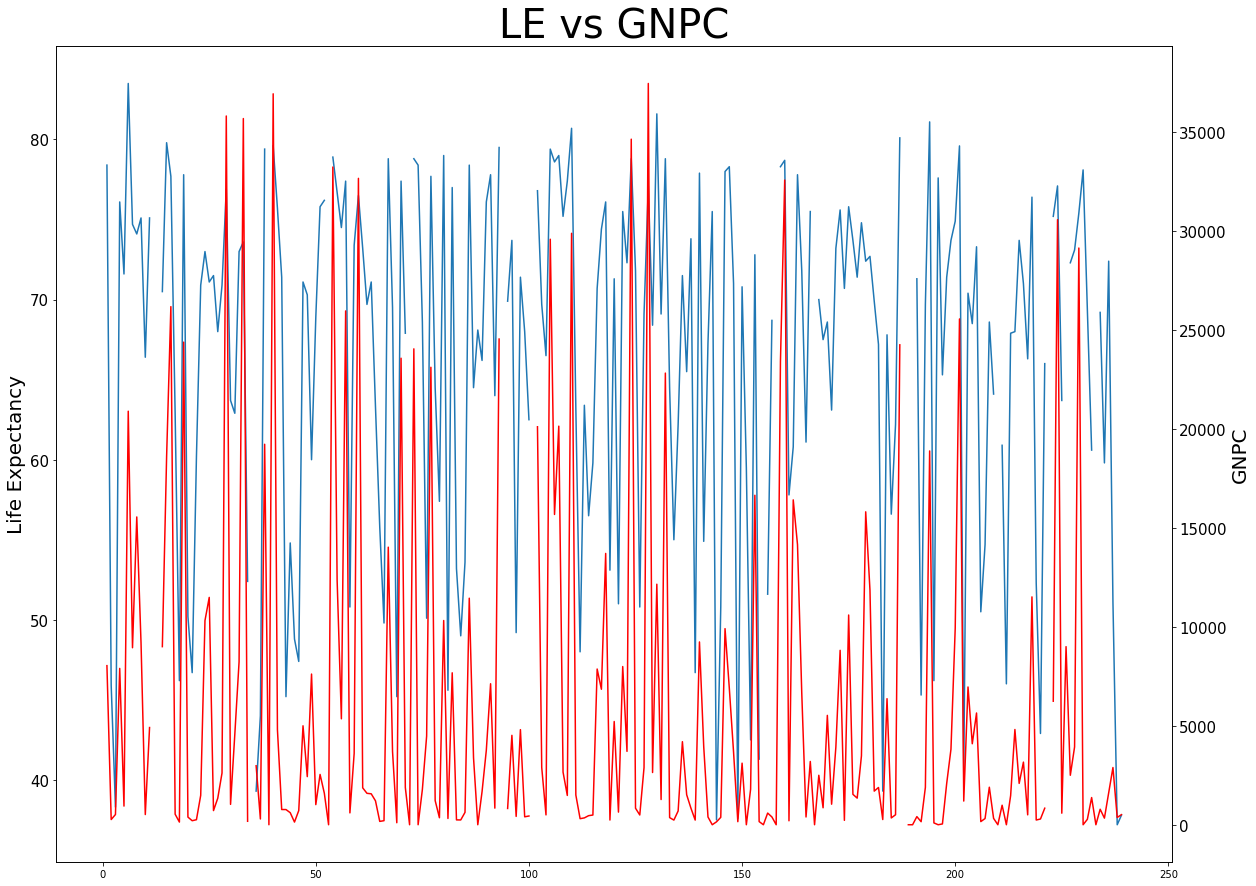

In [42]:

fig,ax=plt.subplots()
fig.set_size_inches(20,15)
plt.title('LE vs GNPC',fontsize=40)
y1=no6['LifeExpectancy']
y2=no6['GNPpercapita']
x=np.arange(1,240)


ax.plot(x,y1,label='Life Expectancy')
ax.set_ylabel('Life Expectancy',fontsize=20)
ax.tick_params('y',labelsize=15)


ax2=ax.twinx()

ax2.plot(x,y2,color='red',label='GNPC')
ax2.set_ylabel('GNPC',fontsize=20)
ax2.tick_params('y',labelsize=15)
plt.show()

Jawablah pertanyaan ini menggunakan chart/plot yang sesuai (setidaknya ada 2 chart/plot), sehingga dapat melandasi jawaban Anda. 

Setuju.

Jika Anda setuju jelaskan alasannya, dan jika anda tidak setuju jelaskan juga alasannya.

pearson, kendall, sama spearman moderate (0.4-0.7)

dari grafik juga relationnya naik.



### __Serta benua manakah yang salah satu negaranya mencetak GNP tertinggi, jika dibandingkan dari benua-benua lainnya?__
Benua dengan GNPpercapita rata2 tertinggi adalah Europe

Negara dengan GNPpercapita tertinggi adalah Luxemburg

In [43]:
benua = no5.groupby('Continent')

In [44]:
benua.describe()['GNPpercapita']['max']

Continent
Africa           11855.507868
Antarctica                NaN
Asia             35685.975610
Europe           37459.260959
North America    35815.384615
Oceania          18594.832151
South America     9187.675524
Name: max, dtype: float64

In [45]:
no5[no5['GNPpercapita']==no5['GNPpercapita'].max()]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPpercapita
127,LUX,Luxembourg,Europe,Western Europe,2586.0,1867.0,435700,77.1,1.632100e+10,15519.0,Luxembourg/LÃ«tzebuerg,Constitutional Monarchy,Henri,2452.0,LU,37459.260959


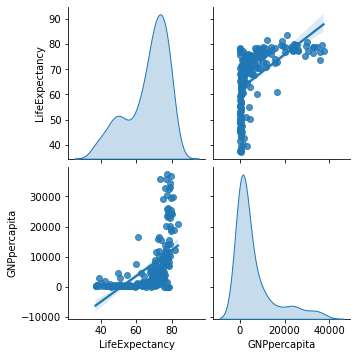

In [46]:
sns.pairplot(no6[['LifeExpectancy', 'GNPpercapita']], palette='colorblind', kind='reg', diag_kind='kde')